## Classification of Breast Cancer : Benign or Malignant

To classify if the cancer diagnosis is benign or malignant based on several observations/features
30 features are used, examples:

  - radius (mean of distances from center to points on the perimeter)
  - texture (standard deviation of gray-scale values)
  - perimeter
  - area
  - smoothness (local variation in radius lengths)
  - compactness (perimeter^2 / area - 1.0)
  - concavity (severity of concave portions of the contour)
  - concave points (number of concave portions of the contour)
  - symmetry 
  - fractal dimension ("coastline approximation" - 1)

Number of Instances: 569
Class Distribution: 212 Malignant, 357 Benign
Target class:
   - Malignant
   - Benign

**Importing Libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

**Reading the breast cancer dataframe**

In [2]:
data_cancer = pd.read_csv("D:\\python\\final pro csv\\datasets_21088_27183_breast-cancer.csv")

**Exploring Data**

In [3]:
data_cancer.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
data_cancer.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [5]:
data_cancer.shape

(569, 33)

In [6]:
data_cancer.describe().T

,count,mean,std,min,25%,50%,75%,max
id,569.0,3.037183e+07,1.250206e+08,8670.000000,869218.000000,906024.000000,8.813129e+06,9.113205e+08
radius_mean,569.0,1.412729e+01,3.524049e+00,6.981000,11.700000,13.370000,1.578000e+01,2.811000e+01
texture_mean,569.0,1.928965e+01,4.301036e+00,9.710000,16.170000,18.840000,2.180000e+01,3.928000e+01
perimeter_mean,569.0,9.196903e+01,2.429898e+01,43.790000,75.170000,86.240000,1.041000e+02,1.885000e+02
area_mean,569.0,6.548891e+02,3.519141e+02,143.500000,420.300000,551.100000,7.827000e+02,2.501000e+03
smoothness_mean,569.0,9.636028e-02,1.406413e-02,0.052630,0.086370,0.095870,1.053000e-01,1.634000e-01
compactness_mean,569.0,1.043410e-01,5.281276e-02,0.019380,0.064920,0.092630,1.304000e-01,3.454000e-01
concavity_mean,569.0,8.879932e-02,7.971981e-02,0.000000,0.029560,0.061540,1.307000e-01,4.268000e-01
concave points_mean,569.0,4.891915e-02,3.880284e-02,0.000000,0.020310,0.033500,7.400000e-02,2.012000e-01
symmetry_mean,569.0,1.811619e-01,2.741428e-02,0.106000,0.161900,0.179200,1.957000e-01,3.040000e-01


**Checking null values**

In [7]:
data_cancer.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

As we have seen there are no null entries except Unnamed:32 so we will delete it later before training

**Mapping Diagnosis variable which is our Target variable to 0 and 1 : 1 for Malignant and 0 for Benign**

In [8]:
data_cancer.loc[:,'diagnosis'] = data_cancer.diagnosis.map({'M':1, 'B':0})

In [9]:
data_cancer.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [10]:
data_cancer.tail()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
564,926424,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN
568,92751,0,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,NaN


**Checking the correlation among different features and target variable diagnosis**

Create a list of potential Features to measure correlation


In [11]:
features = ['radius_mean', 'texture_mean', 'area_mean', 'perimeter_mean', 'smoothness_mean']

In [12]:
for f in features:
    related = data_cancer['diagnosis'].corr(data_cancer[f])
    print("%s: %f" % (f,related))

radius_mean: 0.730029
texture_mean: 0.415185
area_mean: 0.708984
perimeter_mean: 0.742636
smoothness_mean: 0.358560


**Data Visualization**



Visualization of important features in relation to target variable diagnosis to see on which features it is more related

plotting the correlation coefficients of each feature with "diagnosis".

In [13]:
cols= ['id', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst']

In [14]:
for f in cols:
    correlations = data_cancer['diagnosis'].corr(data_cancer[f])
    print("%s: %f" % (f,correlations))

id: 0.039769
radius_mean: 0.730029
texture_mean: 0.415185
perimeter_mean: 0.742636
area_mean: 0.708984
smoothness_mean: 0.358560
compactness_mean: 0.596534
concavity_mean: 0.696360
concave points_mean: 0.776614
symmetry_mean: 0.330499
fractal_dimension_mean: -0.012838
radius_se: 0.567134
texture_se: -0.008303
perimeter_se: 0.556141
area_se: 0.548236
smoothness_se: -0.067016
compactness_se: 0.292999
concavity_se: 0.253730
concave points_se: 0.408042
symmetry_se: -0.006522
fractal_dimension_se: 0.077972
radius_worst: 0.776454
texture_worst: 0.456903
perimeter_worst: 0.782914
area_worst: 0.733825
smoothness_worst: 0.421465
compactness_worst: 0.590998
concavity_worst: 0.659610
concave points_worst: 0.793566
symmetry_worst: 0.416294
fractal_dimension_worst: 0.323872


In [15]:
correlations = [data_cancer['diagnosis'].corr(data_cancer[f]) for f in cols ]

In [16]:
len(correlations), len(cols)

(31, 31)

The number of selected features and the correlations calculated are the same i.e. "31".

Looking at the Visualization of important features in relation to target variable diagnosis to see on which features it is more related

In [17]:

def plot_dataframe(data_cancer, y_label):  
    color='red'
    fig = plt.gcf()
    fig.set_size_inches(15,6)
    plt.ylabel(y_label)

    graph = data_cancer.correlation.plot(linewidth=2.5, color=color)
    graph.set_xticks(data_cancer.index)
    graph.set_xticklabels(data_cancer.attributes, rotation=75);
    plt.show()

In [18]:
df2 = pd.DataFrame({'attributes': cols, 'correlation': correlations}) 

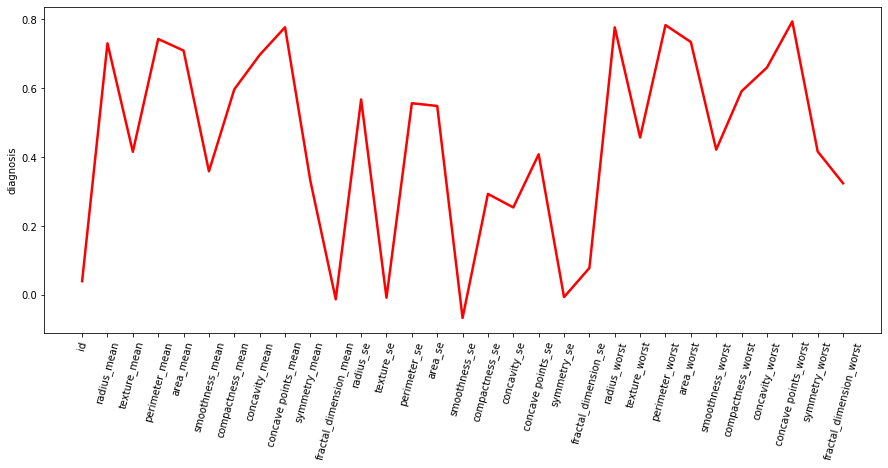

In [19]:
plot_dataframe(df2, 'diagnosis')

**Data Cleaning: Handling Missing Data**

As we have seen Unnamed: 32 is a column with full of NAN and some of the other features such as id is also non contributing feature in cancer prediction so we will be dropping those features before training the model.

In [20]:
unwantedcolumnlist=["diagnosis","Unnamed: 32","id"]

## Convert data for 'Classification'


In [21]:
X = data_cancer.drop(unwantedcolumnlist,axis=1)

In [22]:
y = data_cancer[['diagnosis']]

In [23]:
Y=y.copy()

In [24]:
Y.head()

,diagnosis
0,1
1,1
2,1
3,1
4,1


In [25]:
Y.columns

Index(['diagnosis'], dtype='object')

In [26]:
clean_data= X.copy()

In [27]:
clean_data.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [28]:
X.columns

Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

**split training and testing dataset using sklearn to X_train, X_test,y_train,y_test**

In [29]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.20, random_state=5)

In [30]:
#type(X_train)
#type(X_test)
#type(Y_train)
type(Y_test)

pandas.core.frame.DataFrame

In [31]:
#Y_train.describe()
Y_test.describe()

,diagnosis
count,114.000000
mean,0.421053
std,0.495908
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


In [32]:
#X_train.describe()
X_test.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,114.000000,114.000000,114.000000,114.000000,114.000000,114.000000,114.000000,114.000000,114.000000,114.000000,...,114.000000,114.000000,114.000000,114.000000,114.000000,114.000000,114.000000,114.000000,114.000000,114.000000
mean,14.381947,20.123947,93.961053,684.042105,0.096432,0.113082,0.102959,0.054066,0.183518,0.063608,...,16.787640,26.949737,111.278421,952.292982,0.133587,0.283434,0.308474,0.125452,0.298897,0.085985
std,3.789884,4.418402,26.331994,393.879895,0.014137,0.059645,0.089636,0.043035,0.028226,0.007736,...,5.456311,6.259600,38.652291,693.015240,0.024996,0.180662,0.240165,0.071711,0.072495,0.019429
min,8.219000,10.720000,53.270000,203.900000,0.065760,0.035150,0.000000,0.000000,0.120300,0.050540,...,9.092000,12.870000,58.080000,249.800000,0.087990,0.064770,0.000000,0.000000,0.165200,0.056950
25%,11.760000,17.362500,75.817500,428.700000,0.084885,0.063945,0.029772,0.020735,0.161900,0.058912,...,13.122500,22.817500,85.077500,524.575000,0.114725,0.157675,0.124550,0.072990,0.248650,0.072065
50%,13.530000,19.595000,86.765000,567.400000,0.095480,0.101200,0.078320,0.037455,0.181950,0.061605,...,15.095000,26.470000,97.385000,707.200000,0.130300,0.227700,0.254700,0.105150,0.285250,0.080790
75%,16.152500,22.975000,107.375000,814.300000,0.106050,0.155725,0.160900,0.083440,0.199250,0.067545,...,19.830000,31.435000,131.950000,1221.750000,0.148275,0.387900,0.453575,0.177300,0.322625,0.095270
max,27.420000,30.720000,186.900000,2501.000000,0.142500,0.311400,0.363500,0.191300,0.259700,0.097440,...,36.040000,42.790000,251.200000,4254.000000,0.222600,0.937900,1.252000,0.275600,0.663800,0.173000


In [33]:
diagnosis_class = DecisionTreeClassifier(max_leaf_nodes= 15 , random_state=0)

In [34]:
type(diagnosis_class)

sklearn.tree._classes.DecisionTreeClassifier

In [35]:
print(diagnosis_class)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=15,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


In [36]:
diagnosis_class.fit(X_train,Y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=15,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

**predict on test**

In [37]:
predict= diagnosis_class.predict(X_test)

In [38]:
predict[:15]

array([1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0], dtype=int64)

In [39]:
Y_test['diagnosis'][:15]

28     1
163    0
123    0
361    0
549    0
339    1
286    0
354    0
421    0
124    0
543    0
537    0
567    1
555    0
511    0
Name: diagnosis, dtype: int64

In [40]:
accuracy_score(y_true=Y_test,y_pred=predict)

0.9473684210526315

That's Great we have achieved 94% accuracy to detect malignant or benign breast cancer.